### Notebook for running SONATA on y_branch dataset
Below, we reproduce our results on y_branch dataset, as reported in the manuscript.




In [1]:
import os
import yaml
from sklearn.preprocessing import normalize
from types import SimpleNamespace

import sys
sys.path.append(os.path.dirname(os.getcwd()))
import sonata
from run_baselines.scot import scotv1
from utils.utils import *
from utils.vis import *

/home/h46zhou/enter/envs/sonata_public/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# load parameters and datasets
with open("./cfgs/y_branch.yaml", "r") as file:
        params = yaml.safe_load(file)
params = SimpleNamespace(**params)
        
data_url1 = os.path.join(params.data_path, params.data_url1)
data_url2 = os.path.join(params.data_path, params.data_url2)
print("data_url1 = {}".format(data_url1))
assert os.path.isfile(data_url1) and os.path.isfile(data_url2)

label_url1 = os.path.join(params.data_path, params.label_url1)
label_url2 = os.path.join(params.data_path, params.label_url2)
assert os.path.isfile(label_url1) and os.path.isfile(label_url2)

data1 = load_data(data_url1, )
data2 = load_data(data_url2, )
print("data size: data1 = {}, data2 = {}".format(data1.shape, data2.shape))

label1 = load_data(label_url1, ).astype(int)
label2 = load_data(label_url2, ).astype(int)

if params.norm: 
        data1 = normalize(data1, norm=params.norm)
        data2 = normalize(data2, norm=params.norm)

if params.sort_label: 
        data1, label1, _ = sorted_by_label(data1, label1)
        data2, label2, _ = sorted_by_label(data2, label2)
        
print("data1 shape={}\tdata2 shape={}".format(data1.shape, data2.shape))
print("label1 shape={}\tlabel2 shape={}".format(label1.shape, label2.shape))


data_url1 = ../../data/y_branch/domain1.txt
data size: data1 = (300, 1000), data2 = (300, 2000)
data1 shape=(300, 1000)	data2 shape=(300, 2000)
label1 shape=(300,)	label2 shape=(300,)


### 1. visualize two modalities

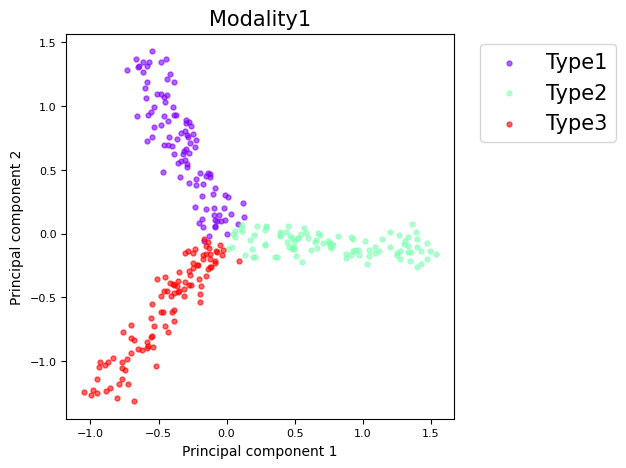

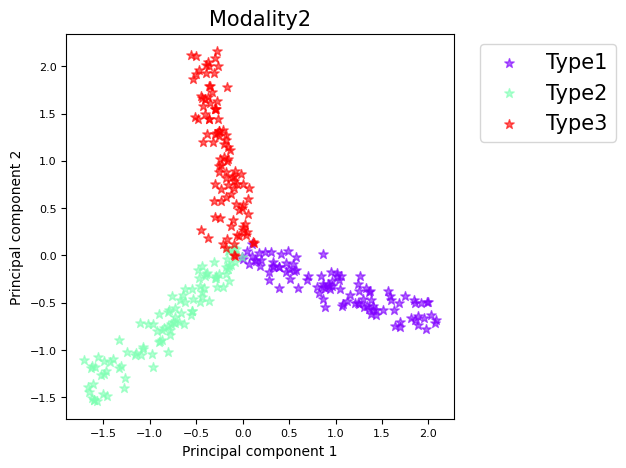

In [7]:
plt_domain_by_labels(data1, label1, title='Modality1', marker='.', a=0.6, show=True)
plt_domain_by_labels(data2, label2, title='Modality2', marker='*', a=0.6, show=True)

### 2. SONATA Diagnose

In [8]:
sn1 = sonata.sonata(noise_scale=params.noise_scale, n_neighbor=params.n_neighbor, n_cluster=params.n_cluster, mode=params.mode, metric=params.metric)
DiagnoseResult1 = sn1.diagnose(data1, save_dir=os.path.join(params.save_dir, "Modality1"))

/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_neighbor=10, noise_scale=0.3, scaleOT = False, scale_sample_rate = 0.1


  0%|          | 0/10 [00:00<?, ?it/s]

---------------OT Alignment Iter=0--------------
It.  |Err         
-------------------
    0|7.446677e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
 10%|█         | 1/10 [00:01<00:16,  1.87s/it]

   10|5.317642e-10|
---------------OT Alignment Iter=1--------------
It.  |Err         
-------------------
    0|7.486983e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
 20%|██        | 2/10 [00:03<00:13,  1.73s/it]

   10|4.791587e-10|
---------------OT Alignment Iter=2--------------


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


It.  |Err         
-------------------
    0|7.484142e-03|


 30%|███       | 3/10 [00:05<00:12,  1.77s/it]

   10|4.624586e-10|
---------------OT Alignment Iter=3--------------
It.  |Err         
-------------------
    0|7.521141e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
 40%|████      | 4/10 [00:07<00:11,  1.97s/it]

   10|2.545010e-10|
---------------OT Alignment Iter=4--------------
It.  |Err         
-------------------
    0|7.368265e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
 50%|█████     | 5/10 [00:09<00:09,  1.93s/it]

   10|1.103295e-10|
---------------OT Alignment Iter=5--------------
It.  |Err         
-------------------
    0|7.456268e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
 60%|██████    | 6/10 [00:12<00:08,  2.19s/it]

   10|1.637516e-10|
---------------OT Alignment Iter=6--------------
It.  |Err         
-------------------
    0|7.370225e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|1.358869e-09|


 70%|███████   | 7/10 [00:15<00:07,  2.49s/it]

   20|1.129567e-15|
---------------OT Alignment Iter=7--------------
It.  |Err         
-------------------
    0|7.547625e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|6.601954e-08|


 80%|████████  | 8/10 [00:18<00:05,  2.73s/it]

   20|1.401935e-15|
---------------OT Alignment Iter=8--------------
It.  |Err         
-------------------
    0|7.497876e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|4.087105e-09|


 90%|█████████ | 9/10 [00:21<00:02,  2.87s/it]

   20|1.259324e-15|
---------------OT Alignment Iter=9--------------
It.  |Err         
-------------------
    0|7.678966e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|2.196590e-09|


100%|██████████| 10/10 [00:24<00:00,  2.45s/it]

   20|1.200305e-15|
---------------Coupling Denoising Iter=0--------------
---------------Coupling Denoising Iter=1--------------
---------------Coupling Denoising Iter=2--------------
---------------Coupling Denoising Iter=3--------------
---------------Coupling Denoising Iter=4--------------
---------------Coupling Denoising Iter=5--------------
---------------Coupling Denoising Iter=6--------------
---------------Coupling Denoising Iter=7--------------
---------------Coupling Denoising Iter=8--------------
---------------Coupling Denoising Iter=9--------------


Outlier cluster indices=[ 31  41  52  54  58  73  74  99 104 173 174 205 235 289 309 326 327 345]
iter=0	include_indices=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  32  33  34  35  36
  37  38  39  40  42  43  44  45  46  47  48  49  50  51  53  55  56  57
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98 100 101 102 103 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200 201 202 203 204 206 207 208 209
 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227
 22

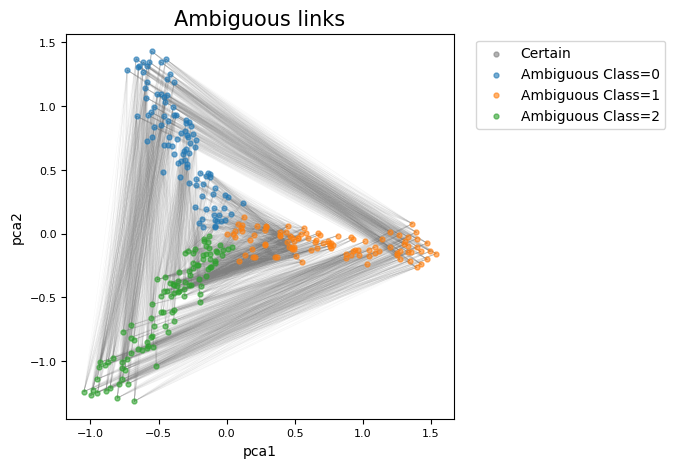

In [9]:
plt_cannotlink_by_labelcolor(data1, DiagnoseResult1.ambiguous_idx, DiagnoseResult1.ambiguous_labels, DiagnoseResult1.cannot_links, alpha=0.6, cl_alpha = 0.1, show=True)

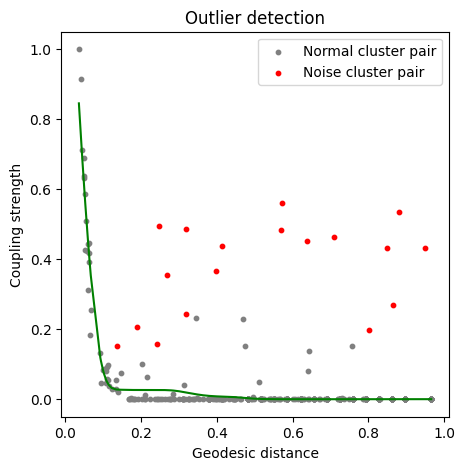

In [10]:
scatter_x = sn1.spline_data.spline_dist
scatter_y = sn1.spline_data.spline_coupling
include_indices = sn1.spline_data.include_indices
exclude_indices = sn1.spline_data.exclude_indices
spline_x = sn1.spline_data.spline_x
spline_y = sn1.spline_data.spline_y
        
plt_fit_spline(scatter_x, scatter_y, include_indices, exclude_indices, spline_x, spline_y, title="Outlier detection", show=True)

### 3. Mapping by SCOT v1 (or any other manifold aligners)

It.  |Err         
-------------------
    0|7.867019e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|7.435583e-11|


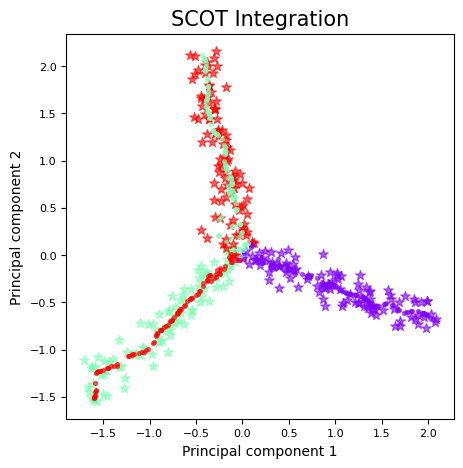

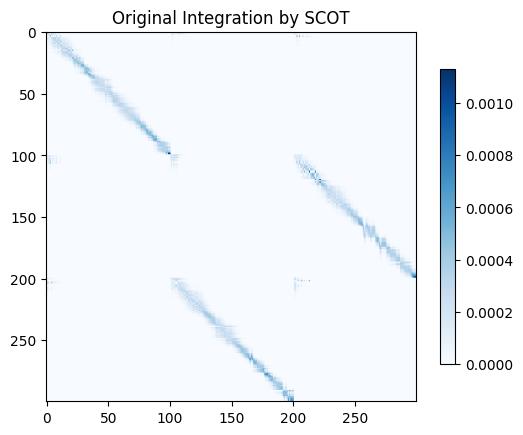

In [11]:
scot = scotv1.SCOT(data1.copy(), data2.copy())
x_aligned, y_aligned = scot.align(k = params.n_neighbor, e=params.e, mode=params.mode, metric=params.metric, normalize=params.norm)
mapping = scot.coupling
            
plt_mapping_by_labels(x_aligned, y_aligned, label1, label2, title = "SCOT Integration", a = 0.6, show=True)   
plt_heatmap(mapping, title="Original Integration by SCOT", show=True)

#### 4. SONATA Corrects the Ambiguous Alignment
We correct ambiguous alignments using the diagnostic results from modality 1 for illustration, though both diagonal results can also be checked.

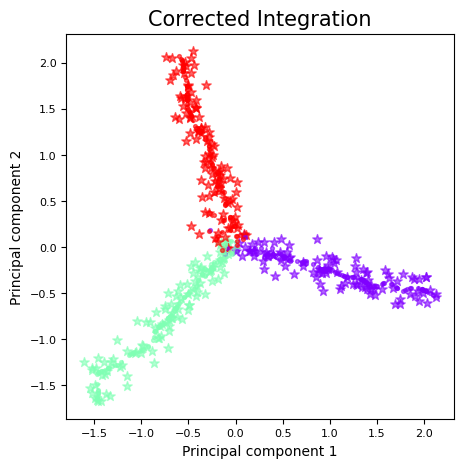

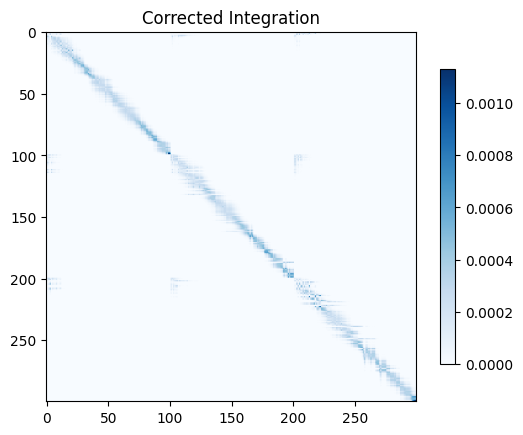

In [12]:
alter_mappings = sonata.map_ambiguous_groups(data1, DiagnoseResult1.ambiguous_labels, DiagnoseResult1.ambiguous_idx)
x_aligned_best, y_aligned_best, best_mapping, _ = sonata_best_acc(x_aligned, y_aligned, label1, label2, alter_mappings, mapping)
     
plt_mapping_by_labels(x_aligned_best, y_aligned_best, label1, label2, title = "Corrected Integration", a = 0.6, show=True)   
plt_heatmap(best_mapping, title="Corrected Integration", show=True)